In [91]:
# using Pkg
# Pkg.add(["DataArrays","DataFrames","Plots","CSV"])
# Pkg.add("KernelDensity")
using DataFrames, Plots, CSV, KernelDensity, Statistics
function myprint(Obj)
    show(stdout, "text/plain", Obj)
end

myprint (generic function with 1 method)

In [172]:
df = DataFrame!(CSV.File("Deliveries.txt", normalizenames = true))

for i in 2:5
    select!(df, Not(findall(occursin.("Fielder"*string(i), names(df)))))
end
for name in names(df)
    u = unique(df[!,name])
    if length(u) == 1
        select!(df, Not(name))
    end
end

#df = df[df.Striker_Hand.=="Right",:]
#df = df[df.Bowler_Hand.=="Right",:]
#df = df[df.Over_The_Wicket.=="Y",:]
df = df[:,:]

df.Hit_To_Angle = df.Hit_To_Angle.*π./180
select!(df, Not([
        "Match_YYMMDD",
        "TeamA_At_Home",
        "Toss_Won_By_Id",
        "TeamA_ResultId",
        "Team_Batting_Id",
        "Time_of_Day_Hour_",
        "Time_of_Day_Min_",
        "Striker_Id",
        "Striker_Hand_Id",
        "Non_Striker_Id",
        "Bowler_Id",
        "Bowler_Hand_Id",
        "Batter_Out_Id",
        "Fielder1_Id",
        "TeamA_Id", 
        "TeamB_Result",
        "Team_Bowling_Result", 
        "Individual_100",
        "Partnership_50",
        "Partnership_100", 
        "Partnership_150", 
        "Event_Grade", 
        "Event_Infield",
        "TeamB_Id",
        "TeamBattingIdMatchInnings1",
        "TeamBattingIdMatchInnings2",
        "TeamBattingIdMatchInnings3",
        "TeamBattingIdMatchInnings4",
        "TeamB_ResultId",
        "Team_Batting_ResultId",
        "Team_Bowling_ResultId",
        "Individual_50",
        "Injury_Striker_Other",           
        "Injury_Bowler_Other_1",          
        "Injury_Fielder_Other",
        "Cum_Inning_Noball_Runs",         
        "Cum_Inning_Wides",               
        "Cum_Inning_Wide_Runs",           
        "Cum_Inning_Byes",                
        "Cum_Inning_Legbyes",             
        "Cum_Inning_Extras",                             
        "Cum_Inning_Wickets",                
        "At_Batter_X_Coded",              
        "At_Batter_Y_Coded",
        "Time_of_Day_Sec_",               
        "Video_Start_Time_UTC",           
        "Video_Stop_Time_UTC",            
        "Video_UTC_Offset_Minutes",       
        "Video_Start_Time_Local",         
        "Video_Stop_Time_Local",
        ]))
df

,Match_Id,Match_Date,Day_Night,Venue_Id,Venue,TeamB_At_Home,Team_Batting_At_Home
,Int64,String,String,Int64,String,String,String
1,3551019,18-Oct-2019,N,6,North Sydney Oval,N,Y
2,3551019,18-Oct-2019,N,6,North Sydney Oval,N,Y
3,3551019,18-Oct-2019,N,6,North Sydney Oval,N,Y
4,3551019,18-Oct-2019,N,6,North Sydney Oval,N,Y
5,3551019,18-Oct-2019,N,6,North Sydney Oval,N,Y
6,3551019,18-Oct-2019,N,6,North Sydney Oval,N,Y
7,3551019,18-Oct-2019,N,6,North Sydney Oval,N,Y
8,3551019,18-Oct-2019,N,6,North Sydney Oval,N,Y
9,3551019,18-Oct-2019,N,6,North Sydney Oval,N,Y


In [9]:
myprint(names(df))

152-element Array{String,1}:
 "Match_Id"
 "Match_Date"
 "Day_Night"
 "Venue_Id"
 "Venue"
 "TeamB_At_Home"
 "Team_Batting_At_Home"
 "Team_Bowling_At_Home"
 "Toss_Won_By_Team"
 "Toss_Won_By_Batting_Team"
 "Toss_Decision"
 "TeamA_Innings1_Closure"
 "TeamA_Innings2_Closure"
 "TeamB_Innings1_Closure"
 "TeamB_Innings2_Closure"
 "TeamA_1st_Comparison"
 "TeamA_Result"
 "Team_Batting"
 "Team_Bowling_Id"
 "Team_Bowling"
 "Innings"
 "Delivery"
 "Session"
 "Time_of_Day"
 "Striker"
 "Striker_Hand"
 "Non_Striker"
 "Non_Striker_Hand_Id"
 "Non_Striker_Hand"
 "Bowler"
 "Bowler_Hand"
 "Pace_Spin"
 "Bowler_Style"
 "Spell"
 "Over_The_Wicket"
 "Northern_End"
 "Power_Play"
 "Over"
 "Ball_In_Over"
 "Fair_Ball_In_Over"
 "Ball_Speed"
 "Pitch_X"
 "Pitch_Y"
 "At_Batter_X"
 "At_Batter_Y"
 "At_Stumps_X"
 "At_Stumps_Y"
 "Hit_To_Len"
 "Hit_To_Angle"
 "Bat_Score"
 "ReachedBoundary"
 "Wides"
 "Noballs"
 "Byes"
 "Legbyes"
 "Taken_By_WK"
 "Batter_Out"
 "How_Out"
 "Fielder1"
 "TeamA"
 "TeamB"
 "TeamBattingMatchInnings1"


In [10]:
allowmissing!(df)
df.Pitch_X[df.Pitch_X.<-10000] .= missing
df.Pitch_Y[df.Pitch_Y.<-10000] .= missing

0-element view(::Array{Union{Missing, Int64},1}, Int64[]) with eltype Union{Missing, Int64}

In [11]:
tocm = function(col)
    factor = 22.86/(720+410)
    return col*factor
end
xshift = (720-410)./2
yshift = 0

0

In [12]:
deliverytypes = unique(df.Pitch_Y_Description)
deliverytypes = deliverytypes[.!isequal.(deliverytypes, missing)]
deliverytypes = deliverytypes[[3;5;2;1;4;6]]

6-element Array{Union{Missing, String},1}:
 "Very Short"
 "Short of a Length"
 "Good length"
 "Half Volley"
 "Yorker"
 "Full Toss"

In [15]:
unique(df.Pitch_X_Description)

5-element Array{Union{Missing, String},1}:
 "Off Stump"
 "Middle Stump"
 "Outside Off"
 "Leg Stump"
 "Outside Leg"

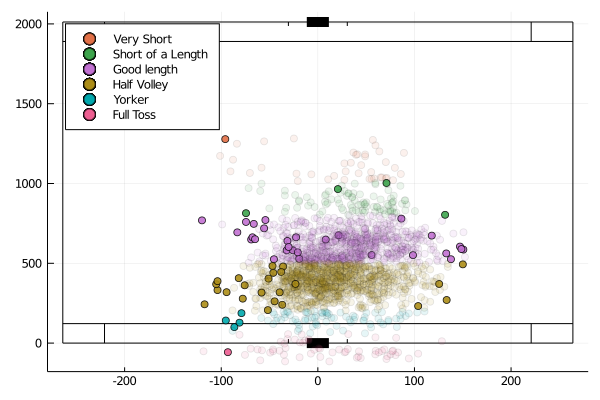

In [31]:
pitchxdata = (df.Pitch_X./10 .- xshift./10)*1.34
pitchydata = df.Pitch_Y./10 
#pitchxdataS = tocm(df.Pitch_X[df.Northern_End.=="S"]).-xshift
#pitchydataS = tocm(df.Pitch_Y[df.Northern_End.=="S"]).+yshift

OffEdge = 264
LegEdge = -OffEdge
OffWide= OffEdge-43.18
LegWide = -OffWide
Crease = 122
Popping = 0
PitchLength = 2012
OffStump = 22.86/2
LegStump = -OffStump
OffPA = 30.48
LegPA = -OffPA

plot(legend = :topleft)
plot!([OffEdge, OffEdge],[0,PitchLength], label = nothing, color = :black) # left edge
plot!([LegEdge, LegEdge],[0,PitchLength], label = nothing, color = :black) # right edge

# strikers end
plot!([OffWide, OffWide],[0,Crease], label = nothing, color = :black) # off wide
plot!([LegWide, LegWide],[0,Crease], label = nothing, color = :black) # leg wide
plot!([LegEdge,OffEdge],[Popping, Popping], label = nothing, color = :black) # popping crease
plot!([LegEdge,OffEdge],[Crease, Crease], label = nothing, color = :black) # crease
plot!([OffPA,OffPA],[0,25], label = nothing, color = :black) # protected area
plot!([LegPA,LegPA],[0,25], label = nothing, color = :black) # protected area
plot!([LegStump,OffStump],[Popping, Popping], linewidth=10, label = nothing, color = :black) # stumps

# non-strikers end
plot!([OffWide, OffWide],PitchLength.-[0,Crease], label = nothing, color = :black) # off wide
plot!([LegWide, LegWide],PitchLength.-[0,Crease], label = nothing, color = :black) # leg wide
plot!([LegEdge,OffEdge],PitchLength.-[Popping, Popping], label = nothing, color = :black) # popping crease
plot!([LegEdge,OffEdge],PitchLength.-[Crease, Crease], label = nothing, color = :black) # crease
plot!([OffPA,OffPA],PitchLength.-[0,25], label = nothing, color = :black) # protected area
plot!([LegPA,LegPA],PitchLength.-[0,25], label = nothing, color = :black) # protected area
plot!([LegStump,OffStump],PitchLength.-[Popping, Popping], linewidth=10, label = nothing, color = :black) # stumps

c = 0
for description in deliverytypes
    c = c + 1
    colours = 1 .+ c
    scatter!(
        pitchxdata[isequal.(df.Pitch_Y_Description,description)],
        pitchydata[isequal.(df.Pitch_Y_Description,description)],
        color = colours,
        label = description,
        alpha = 
            0.1 .+ 
            0.8*(
                df.Wides[isequal.(df.Pitch_Y_Description,description)].>0
            ),
    )
end
annotate!(-200,-500,text("Leg"))
annotate!(200,-500,text("Off"))

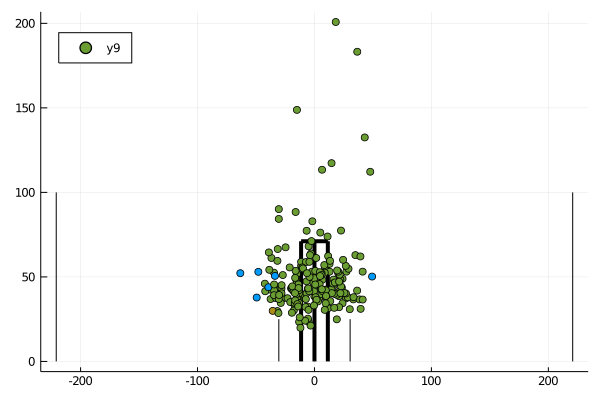

In [57]:
atbatterxdata = df.At_Batter_X./10 .- xshift./10
atbatterydata = df.At_Batter_Y./10

plot(legend = :topleft)

# strikers end
plot!([OffWide, OffWide],[0,100], label = nothing, color = :black) # off wide
plot!([LegWide, LegWide],[0,100], label = nothing, color = :black) # leg wide
plot!([OffPA,OffPA],[0,25], label = nothing, color = :black) # protected area
plot!([LegPA,LegPA],[0,25], label = nothing, color = :black) # protected area
plot!([LegStump,OffStump],[71.1, 71.1], linewidth=4, label = nothing, color = :black) # stumps
plot!([LegStump,LegStump],[0, 71.1], linewidth=4, label = nothing, color = :black) # stumps
plot!([OffStump,OffStump],[0, 71.1], linewidth=4, label = nothing, color = :black) # stumps
plot!([0,0],[0, 71.1], linewidth=4, label = nothing, color = :black) # stumps

# c = 0
# for description in deliverytypes
#     c = c + 1
#     colours = 1 .+ c
#     scatter!(
#         pitchxdata[isequal.(df.Pitch_Y_Description,description)],
#         pitchydata[isequal.(df.Pitch_Y_Description,description)],
#         color = colours,
#         label = description,
#     )
# end
# annotate!(-200,-500,text("Leg"))
# annotate!(200,-500,text("Off"))

# plot(legend=false)
# plot!([-228.6/2,228.6/2],[711.2,711.2], color = :black)
# plot!([-228.6/2,-228.6/2],[0,711.2], color = :black)
# plot!([228.6/2,228.6/2],[0,711.2], color = :black)
# plot!([304.8,304.8],[-10,2000], color = :black)
# plot!([-304.8,-304.8],[-10,2000], color = :black)
# plot!([1320-431.8,1320-431.8],[-10,2000], color = :black)
# plot!([-1320+431.8,-1320+431.8],[-10,2000], color = :black)
scatter!(atbatterxdata, atbatterydata, color = df.Wides)

In [150]:
df.At_Stumps_X[abs.(df.At_Stumps_X).>1000] .= missing
df.At_Stumps_Y[abs.(df.At_Stumps_Y).>1000] .= missing;

ArgumentError: ArgumentError: unable to check bounds for indices of type Missing

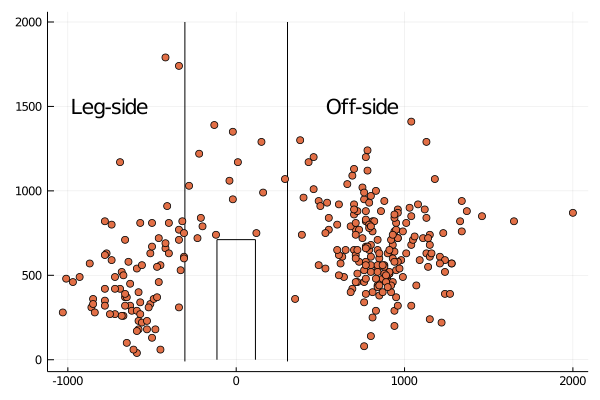

In [158]:
idx = (
    (df.Pitch_X_Description[:].=="Outside Off") .| 
    (df.Pitch_X_Description[:].=="Outside Leg")
    ) .& .!ismissing.(df.Data_Source)
atstumpsxdata = df.At_Stumps_X[idx]
atstumpsydata = df.At_Stumps_Y[idx]

plot(legend=false)
plot!([-228.6/2,228.6/2],[711.2,711.2], color = :black)
plot!([-228.6/2,-228.6/2],[0,711.2], color = :black)
plot!([228.6/2,228.6/2],[0,711.2], color = :black)
plot!([304.8,304.8],[-10,2000], color = :black)
plot!([-304.8,-304.8],[-10,2000], color = :black)
colours = 1 .+
    (df.Pitch_X_Description[idx].=="Outside Off") .+
    (df.Pitch_X_Description[idx].=="Outside Leg") 
scatter!(
    atstumpsxdata, 
    atstumpsydata, 
    color = colours,
)
annotate!(-750, 1500, text("Leg-side"))
annotate!(750, 1500, text("Off-side"))


In [128]:
sum((df.Pitch_X_Description.=="Outside Off").|(df.Pitch_X_Description.=="Outside Leg"))

1284

In [132]:
hittoxdata[:,isequal.(df.Northern_End,"N")]

2×5006 Array{Float64,2}:
 0.0       0.0       0.0     0.0      …    0.0       0.0       0.0
 3.61063  78.7074  -12.5758  7.65101     -20.1294  -61.9265  -11.9679

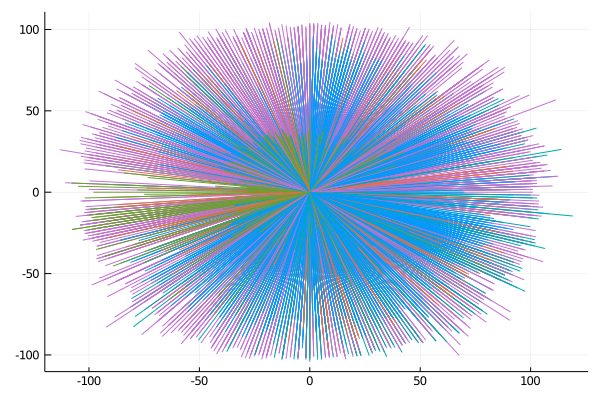

In [181]:
hittox = df.Hit_To_Len.*cos.(df.Hit_To_Angle)
hittoy = df.Hit_To_Len.*sin.(df.Hit_To_Angle)
hittoxdata = [zeros(size(hittox)) hittox]'
hittoydata = [zeros(size(hittoy)) hittoy]'
plot(legend=false)
plot!(hittoxdata[:,isequal.(df.Northern_End,"N")], hittoydata[:,isequal.(df.Northern_End,"N")], color = df.Bat_Score[isequal.(df.Northern_End,"N")]')

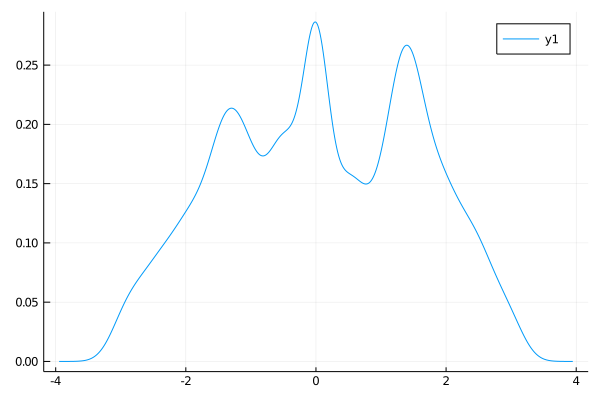

In [182]:
U = kde(df.Hit_To_Angle)
plot(U.x,U.density)

83

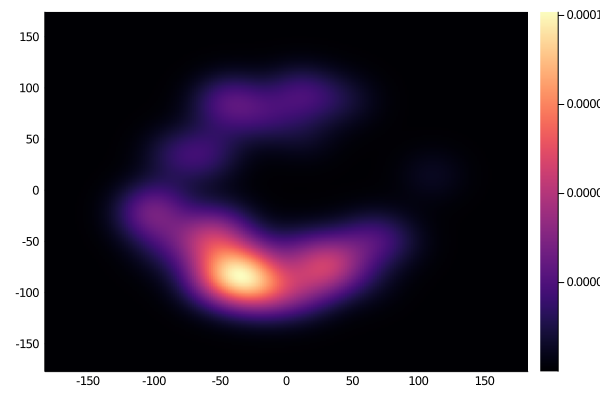

In [183]:
hittox = df.Hit_To_Len.*cos.(df.Hit_To_Angle)
hittoy = df.Hit_To_Len.*sin.(df.Hit_To_Angle)
d = sqrt.(hittox.^2+hittoy.^2)
hittox = convert.(Float64,hittox)
hittoy = convert.(Float64,hittoy)
idx = (d.>50) .&
    (
        (df.Pitch_X_Description.=="Middle Stump") .| 
        (df.Pitch_X_Description.=="Leg Stump") .| 
        (df.Pitch_X_Description.=="Outside Leg")
    ) .&
    ((df.Pitch_Y_Description.=="Short of a Length") .| (df.Pitch_Y_Description.=="Very Short"))
hittox = hittox[idx]
hittoy = hittoy[idx]
# b = 1.06*std(df.Hit_To_Angle)*length(df.Hit_To_Angle)^(-1/5)
U = kde((hittox,hittoy))
display(sum(idx))
heatmap(U.x, U.y, U.density, color = :magma)

In [113]:
d = sqrt.(hittox.^2+hittoy.^2)
data = convert.(Float64,df.Hit_To_Angle)
data = data[d.>10]

8555-element Array{Float64,1}:
   88.0
  -93.0
  129.0
  -64.0
   50.0
  -82.0
   -2.0
   -4.0
  -64.0
   23.0
   40.0
   33.0
   48.0
    ⋮
  -91.0
   53.0
   68.0
   82.0
   39.0
 -133.0
   35.0
  -63.0
   84.0
 -126.0
 -121.0
   81.0

In [123]:
df.Northern_End

10000-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "N"
 "N"
 "N"
 "N"
 "N"
 "N"
 "S"
 "S"
 "S"
 "S"
 "S"
 "S"
 "N"
 ⋮
 "N"
 "S"
 "S"
 "S"
 "S"
 "S"
 "S"
 "N"
 "N"
 "N"
 "N"
 "N"